# Espacializando os atendimentos do SP156

O primeiro passo para espacializarmos os dados de atendimento do SP156 é juntar os arquivos. Para isso vamos utilziar a biblioteca Pandas

In [88]:
import pandas as pd
import glob

path = r'download' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, encoding="ISO-8859-1", delimiter=';', parse_dates=['Data de abertura', 'Data do parecer'])
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)


C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [89]:
frame['Latitude'] = pd.to_numeric(frame['Latitude'].str.replace(',', '.'), errors='coerce')
frame['Longitude'] = pd.to_numeric(frame['Longitude'].str.replace(',', '.'), errors='coerce')

In [90]:
frame.dtypes


Data de abertura         datetime64[ns]
Canal                            object
Tema                             object
Assunto                          object
Serviço                          object
Logradouro                       object
Número                           object
CEP                              object
Subprefeitura                    object
Distrito                         object
Setor                            object
Quadra                           object
Latitude                        float64
Longitude                       float64
Data do parecer          datetime64[ns]
Status da solicitação            object
Órgão                            object
dtype: object

In [91]:
frame

,Data de abertura,Canal,Tema,Assunto,Serviço,Logradouro,Número,CEP,Subprefeitura,Distrito,Setor,Quadra,Latitude,Longitude,Data do parecer,Status da solicitação,Órgão
0,2019-07-01 00:00:15,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,SE,REPUBLICA,NaN,NaN,NaN,NaN,2019-07-01 02:49:11,FINALIZADA,SMADS
1,2019-07-01 00:00:42,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,SANTANA-TUCURUVI,SANTANA,NaN,NaN,NaN,NaN,2019-07-01 01:56:37,FINALIZADA,SMADS
2,2019-07-01 00:04:40,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,PINHEIROS,PINHEIROS,NaN,NaN,NaN,NaN,2019-07-01 03:35:26,FINALIZADA,SMADS
3,2019-07-01 00:08:07,PORTAL ONLINE,Trânsito e Transporte,Reclamação ônibus,Ônibus - Denúncia de problemas no embarque/des...,NaN,NaN,NaN,SAO MATEUS,SAO MATEUS,NaN,NaN,NaN,NaN,2019-07-01 01:32:42,CANCELADA,SPTRANS
4,2019-07-01 00:14:57,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,MOOCA,BRAS,NaN,NaN,NaN,NaN,2019-07-01 02:18:57,FINALIZADA,SMADS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137578,2018-12-31 23:29:25,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,,,,SE,REPUBLICA,,,NaN,NaN,2019-01-01 03:16:22,FINALIZADA,SMADS
4137579,2018-12-31 23:40:26,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,,,,CIDADE TIRADENTES,CIDADE TIRADENTES,,,NaN,NaN,2019-01-01 05:30:35,FINALIZADA,SMADS
4137580,2018-12-31 23:40:40,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,,,,SE,SE,,,NaN,NaN,2019-01-01 03:57:14,FINALIZADA,SMADS
4137581,2018-12-31 23:46:31,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,,,,MOOCA,BRAS,,,NaN,NaN,2019-01-01 04:44:28,FINALIZADA,SMADS


## Contabilizando e agrupando

Agora podemos ter um panorama geral de cada um dos campos

In [92]:
#frame.Canal.unique().tolist()
frame.groupby(['Canal', 'Tema', 'Assunto', 'Serviço']).size().to_csv(r'resultados\sp156_atendimentos_agrupados.csv')

C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [93]:
frame.groupby(['Tema', 'Assunto', 'Serviço']).size().to_csv(r'resultados\sp156_atendimentos_agrupados_sem_canal.csv')

C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [94]:
frame.groupby('Tema').Tema.count()

Tema
Acessibilidade                       1950
Animais                            207043
Bilhete Único                      108774
Canais de Atendimento               16572
Cidadania e assistência social     415156
Comércio e serviços                 71590
Cultura, esporte e lazer             1151
Documentos e licenças               37452
Educação                            21000
Finanças                            16264
Lixo e limpeza                     587609
Localizacao de tumulo                   1
Meio Ambiente                       11569
Obras, imóveis e habitação          87221
Ouvidoria Geral do Município        87358
Rua e bairro                      1531553
SAC/GRC                              4989
Saúde                              104990
Segurança urbana                     3106
Trabalho                             8591
Trânsito e Transporte              746302
Urgência                            67342
Name: Tema, dtype: int64

In [95]:
frame.groupby('Assunto')['Assunto'].count()

Assunto
ATENDE - Transporte Pessoas com Deficiência      1519
Acessibilidade Digital                             39
Acessibilidade em edificações                    1793
Agendamento eletrônico                           4462
Alimentação escolar                               223
                                                ...  
Áreas de pedestre (calçadões)                      69
Áreas municipais                                 8810
Árvore                                         322125
Árvore(Praça Pública)                               8
Ônibus                                          57107
Name: Assunto, Length: 226, dtype: int64

In [96]:
frame.groupby('Distrito')['Distrito'].count()

Distrito
AGUA RASA            34902
ALTO DE PINHEIROS    19950
ANHANGUERA            7499
ARICANDUVA           29969
ARTUR ALVIM          26242
                     ...  
VILA MARIANA         47831
VILA MATILDE         37212
VILA MEDEIROS        32053
VILA PRUDENTE        41655
VILA SONIA           38360
Name: Distrito, Length: 96, dtype: int64

In [97]:
frame['Data de abertura'].groupby([frame['Data de abertura'].dt.year, frame['Data de abertura'].dt.month]).count()

Data de abertura  Data de abertura
2015              1                    74059
                  2                    64227
                  3                    92730
                  4                    71418
                  5                    56706
                  6                    49107
                  7                    49803
                  8                    51014
                  9                    54866
                  10                   55461
                  11                   64924
                  12                   68600
2016              1                    80385
                  2                    96014
                  3                    93911
                  4                    70341
                  5                    58165
                  6                    58497
                  7                    50545
                  8                    54150
                  9                    55095
                  10

In [98]:
df_agrupado = frame.groupby(['Tema', 'Assunto', 'Serviço'])

In [99]:
#Percentual georeferenciado
quantidade_georeferenciada = len(frame[(frame['Data de abertura'] > '2019-01-01 00:00:00') & frame.Longitude.notna() & frame.Latitude.notna()])
quantidade_total = len(frame[(frame['Data de abertura'] > '2019-01-01 00:00:00')])
percentual = quantidade_georeferenciada / quantidade_total

In [100]:
print("Quantidade georeferenciada com Lat e Long:")
print(quantidade_georeferenciada)
print("Quantidade total de registros:")
print(quantidade_total)
print("Percentual Georeferenciado:")
print(percentual)

Quantidade georeferenciada com Lat e Long:
294507
Quantidade total de registros:
1125990
Percentual Georeferenciado:
0.261553832627288


In [101]:
#Percentual com setor e quadra
quantidade_setor_quadra = len(frame[(frame['Data de abertura'] > '2019-01-01 00:00:00') & (frame.Setor.str.isnumeric() | frame.Quadra.str.isnumeric()) & frame.Longitude.isna() & frame.Latitude.isna()])
quantidade_total = len(frame[(frame['Data de abertura'] > '2019-01-01 00:00:00')])
percentual = quantidade_setor_quadra / quantidade_total

In [102]:
print("Quantidade georeferenciada com Lat e Long:")
print(quantidade_setor_quadra)
print("Quantidade total de registros:")
print(quantidade_total)
print("Percentual Georeferenciado:")
print(percentual)

Quantidade georeferenciada com Lat e Long:
14781
Quantidade total de registros:
1125990
Percentual Georeferenciado:
0.013127114805637706


In [103]:
#Percentual com Logradouro e número
quantidade_logradouro_numero = len(frame[((frame.Logradouro.str.len() > 1) & (frame['Número'].str.len() > 1)) & frame.Longitude.isna() & frame.Latitude.isna()])
quantidade_total = len(frame)
percentual = quantidade_logradouro_numero / len(frame['Data de abertura'])

In [104]:
print("Quantidade georeferenciável com Endereço:")
print(quantidade_logradouro_numero)
print("Quantidade total de registros:")
print(quantidade_total)
print("Percentual Georeferenciado:")
print(percentual)

Quantidade georeferenciável com Endereço:
0
Quantidade total de registros:
4137583
Percentual Georeferenciado:
0.0


In [105]:
frame[((frame.Logradouro.str != '') & (frame['Número'].str != '')) & frame.Longitude.isna() & frame.Latitude.isna()]

,Data de abertura,Canal,Tema,Assunto,Serviço,Logradouro,Número,CEP,Subprefeitura,Distrito,Setor,Quadra,Latitude,Longitude,Data do parecer,Status da solicitação,Órgão
0,2019-07-01 00:00:15,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,SE,REPUBLICA,NaN,NaN,NaN,NaN,2019-07-01 02:49:11,FINALIZADA,SMADS
1,2019-07-01 00:00:42,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,SANTANA-TUCURUVI,SANTANA,NaN,NaN,NaN,NaN,2019-07-01 01:56:37,FINALIZADA,SMADS
2,2019-07-01 00:04:40,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,PINHEIROS,PINHEIROS,NaN,NaN,NaN,NaN,2019-07-01 03:35:26,FINALIZADA,SMADS
3,2019-07-01 00:08:07,PORTAL ONLINE,Trânsito e Transporte,Reclamação ônibus,Ônibus - Denúncia de problemas no embarque/des...,NaN,NaN,NaN,SAO MATEUS,SAO MATEUS,NaN,NaN,NaN,NaN,2019-07-01 01:32:42,CANCELADA,SPTRANS
4,2019-07-01 00:14:57,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,NaN,NaN,NaN,MOOCA,BRAS,NaN,NaN,NaN,NaN,2019-07-01 02:18:57,FINALIZADA,SMADS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137577,2018-12-31 23:21:20,PORTAL ONLINE,Rua e bairro,"Calçadas, guias e postes",Obstáculo dificultando acessibilidade,,,,VILA MARIANA,SAUDE,,,NaN,NaN,2019-04-11 20:29:05,FINALIZADA,SMPR
4137578,2018-12-31 23:29:25,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,,,,SE,REPUBLICA,,,NaN,NaN,2019-01-01 03:16:22,FINALIZADA,SMADS
4137579,2018-12-31 23:40:26,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,,,,CIDADE TIRADENTES,CIDADE TIRADENTES,,,NaN,NaN,2019-01-01 05:30:35,FINALIZADA,SMADS
4137580,2018-12-31 23:40:40,CENTRAL TELEFÔNICA,Cidadania e assistência social,População ou pessoa em situação de rua,Serviço Especializado de Abordagem Social às P...,,,,SE,SE,,,NaN,NaN,2019-01-01 03:57:14,FINALIZADA,SMADS


In [106]:
# Agrupando por temas os atendimentos georeferenciaveis
frame[frame.Setor.str.isnumeric() | frame.Quadra.str.isnumeric() | frame.Longitude.notna() | frame.Latitude.notna()].groupby(['Tema', 'Assunto', 'Serviço']).size().to_csv(r'resultados\sp156_atendimentos_agrupados_georeferenciaveis.csv')

C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


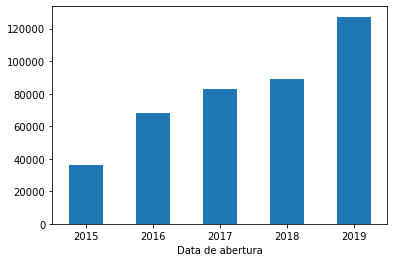

In [107]:
frame.index.name = 'id'
frame['counter'] = 1
#frame_mes_SEAS = frame.loc[frame['Serviço'] == 'Serviço Especializado de Abordagem Social às Pessoas em Situação de Rua - SEAS'].groupby([frame['Data de abertura'].dt.year, frame['Data de abertura'].dt.month]).counter.count()
frame_mes_SEAS = frame.loc[frame['Serviço'] == 'Serviço Especializado de Abordagem Social às Pessoas em Situação de Rua - SEAS'].groupby(frame['Data de abertura'].dt.year).counter.count()
ax = frame_mes_SEAS.plot.bar(x='m', y='v', rot=0)

In [108]:
frame.loc[frame['Serviço'] == 'Serviço Especializado de Abordagem Social às Pessoas em Situação de Rua - SEAS'][['Canal','Data de abertura', 'Distrito']].to_csv(r'resultados\sp156_atendimento_SEAS.csv')

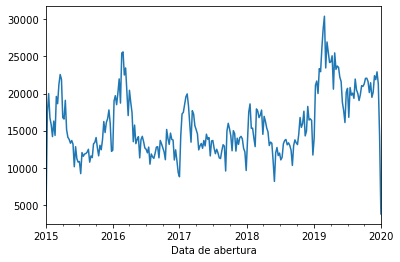

In [109]:
#frame['Data de abertura'].dt.cumsum()
frame.set_index('Data de abertura').groupby(pd.Grouper(freq='W')).counter.count().plot()

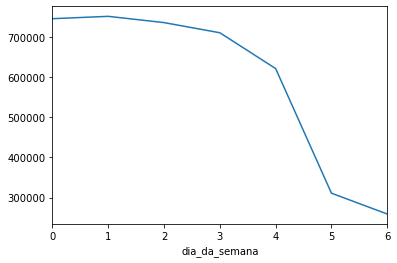

In [110]:
frame['dia_da_semana'] = frame['Data de abertura'].dt.dayofweek
frame.groupby(['dia_da_semana']).counter.count().plot()

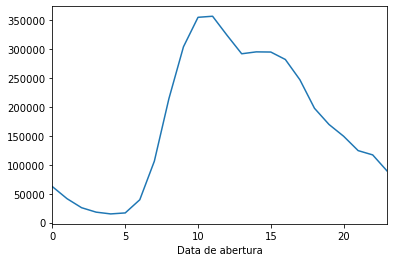

In [111]:
frame['horario'] = frame['Data de abertura'].dt.time
frame.groupby(frame['Data de abertura'].dt.hour).counter.count().plot()

In [112]:
# Importando o PyEphem, uma biblioteca de calculos astronomicos, afim de determinar a estação do ano.
import ephem
print(ephem.next_equinox('2020/3/20 03:49:33'))


2020/9/22 13:30:38


## Separando os atendimentos de 2019

Agora vamos separar apenas os atendimentos de 2019 que tenham Latitude e Longitude em arquivos agregados por seu tema.

In [113]:
frame_2019_geo = frame[frame['Data de abertura'] > '2019-01-01 00:00:00'][frame.Longitude.notna() & frame.Latitude.notna()]

C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


## Transformando o DataFrame em GeoDataFrame

Agora que temos o DataFrame dos atendimentos de 2019 que tem latitude e longitude, podemos criar a informação espacializada com a li GeoPandas

In [114]:
import geopandas

In [115]:
gdf = geopandas.GeoDataFrame(frame_2019_geo, geometry=geopandas.points_from_xy(frame_2019_geo.Longitude, frame_2019_geo.Latitude)).drop(columns="horario")
gdf.crs = {'init': 'epsg:4326', 'no_defs': True}
gdf = gdf.to_crs({'init': 'epsg:31983'})

C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


In [116]:
# Salvando o Arquivo em GeoJson
gdf.to_file("resultados/atendimentos_SP156_geo_2019.gpkg", layer='atendimentos_SP156_2019', driver="GPKG")

In [117]:
gdf

,Data de abertura,Canal,Tema,Assunto,Serviço,Logradouro,Número,CEP,Subprefeitura,Distrito,Setor,Quadra,Latitude,Longitude,Data do parecer,Status da solicitação,Órgão,counter,dia_da_semana,geometry
id,,,,,,,,,,,,,,,,,,,,
9,2019-07-01 00:42:41,PORTAL ONLINE,Lixo e limpeza,Feira Livre,Reclamação de falta de limpeza de ruas após a ...,Rua Ataliba Viêira,842,2.216e+06,VILA MARIA-VILA GUILHERME,VILA MEDEIROS,68,501,-23.489937,-46.583679,2019-07-01 11:12:32,FINALIZADA,AMLURB,1,0,POINT (338279.679 7401351.609)
25,2019-07-01 01:40:09,APLICATIVO,Rua e bairro,"Reparos em asfalto, pontes e viadutos",Tapa-buraco,Alameda Santo Amaro,273,4.745e+06,SANTO AMARO,SANTO AMARO,88,272,-23.656073,-46.706463,2019-07-28 11:42:36,FINALIZADA,SMSUB,1,0,POINT (325958.079 7382810.000)
26,2019-07-01 01:41:42,APLICATIVO,Rua e bairro,Drenagem de água de chuva,"Limpeza de bueiros, boca de lobo e poços de vi...",Rua Maria Almeida do Prado,85,4.74502e+06,SANTO AMARO,SANTO AMARO,88,272,-23.657470,-46.704432,2019-07-01 08:26:10,FINALIZADA,AMLURB,1,0,POINT (326167.130 7382657.735)
35,2019-07-01 04:51:57,CENTRAL TELEFÔNICA,Trânsito e Transporte,Reclamação ônibus,Ônibus - Reclamação de intervalo excessivo da ...,Avenida Dezenove de Janeiro,884,3.449e+06,ARICANDUVA-FORMOSA-CARRAO,CARRAO,116,273,-23.558670,-46.522110,2019-07-01 18:51:42,FINALIZADA,SPTRANS,1,0,POINT (344648.660 7393808.573)
37,2019-07-01 05:16:48,APLICATIVO,Lixo e limpeza,"Ponto viciado, entulho e caçamba de entulho",Remoção de entulho em via pública,Rua dos Protestantes,173,1.21202e+06,SE,REPUBLICA,NaN,NaN,-23.535332,-46.637868,2019-07-03 00:49:42,FINALIZADA,AMLURB,1,0,POINT (332802.395 7396262.689)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2762789,2019-06-30 22:50:22,PORTAL ONLINE,Rua e bairro,"Reparos em asfalto, pontes e viadutos",Tapa-buraco,Rua Bento Gonçalves,235,3334000,MOOCA,AGUA RASA,NaN,NaN,-23.553722,-46.571100,2019-07-24 11:35:35,FINALIZADA,SMPR,1,6,POINT (339641.736 7394302.494)
2762793,2019-06-30 22:53:42,CENTRAL TELEFÔNICA,Lixo e limpeza,"Ponto viciado, entulho e caçamba de entulho",Remoção de entulho em via pública,Rua Professor José Lourenço,915,2977020,PIRITUBA-JARAGUA,PIRITUBA,126,313,-23.467568,-46.713742,2019-07-03 11:36:28,FINALIZADA,AMLURB,1,6,POINT (324965.907 7403676.356)
2762803,2019-06-30 23:05:23,PORTAL ONLINE,Lixo e limpeza,"Ponto viciado, entulho e caçamba de entulho",Remoção de entulho em via pública,Viaduto Dante Delmanto,1126,4310100,JABAQUARA,JABAQUARA,NaN,NaN,-23.628850,-46.641316,2019-07-05 12:56:13,FINALIZADA,AMLURB,1,6,POINT (332569.005 7385902.528)


## Trantando pontos fora dos limites do município de São Paulo

Existem casos em que os pontos estão localizados fora dos limites do município de São Paulo e para finalidade de estudo vamos quantifica-los e discriminá-los para estudos posteriores.

In [118]:
msp = geopandas.read_file('arquivos/SP.shp')

In [119]:
gdf_sp = geopandas.sjoin(gdf, msp, how='left', op='within')

C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\geopandas\tools\sjoin.py:61: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:31983'} != {'proj': 'utm', 'zone': 23, 'south': True, 'ellps': 'GRS80', 'units': 'm', 'no_defs': True})
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [120]:
gdf_sp[gdf_sp.municipio.isna()].to_file("resultados/fora_dos_limites.gpkg", layer='fora_dos_limites', driver="GPKG")

## Salvando as camadas de tema

Vamos organizar inicialmente esses dados por camadas de acordo com o tema

In [121]:
# Determinando os temas
gdf_sp.groupby('Tema').Tema.count()

Tema
Animais                    4015
Lixo e limpeza           113220
Rua e bairro             158998
Trânsito e Transporte     18274
Name: Tema, dtype: int64

In [ ]:
# salvando uma camada por tema dentro do arquivo gpkg

for index, row in gdf_sp.groupby('Tema').agg({'Tema': 'unique'}).iterrows():
    #print(row['Tema'][0])
    gdf_sp[gdf_sp.municipio.notna()][gdf_sp.Tema == row['Tema'][0]].to_file("resultados/temas_SP156_2019.gpkg", layer=row['Tema'][0], driver="GPKG")

C:\Users\D877341\AppData\Local\Continuum\miniconda3\lib\site-packages\geopandas\geodataframe.py:557: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super(GeoDataFrame, self).__getitem__(key)
